In [33]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06")

print(results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE strftime(?, measurement.date) = ?


In [6]:
#  3. Convert the June temperatures to a list.
results = results.all()

print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temp_df = pd.DataFrame(results,columns=['date','June Temps'])
June_temp_df.set_index(June_temp_df['date'],inplace=True)

June_temp_df.head()

,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12")

print(results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE strftime(?, measurement.date) = ?


In [10]:
# 7. Convert the December temperatures to a list.
results=results.all()
print(results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_temp_df = pd.DataFrame(results,columns=['date','December Temps'])
December_temp_df.set_index(December_temp_df['date'],inplace=True)

December_temp_df.head()

,date,December Temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [15]:
# create DataFrame for precipitation in June
results = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06").all()
June_precip_df = pd.DataFrame(results, columns=['Date','June Precipitation'])
June_precip_df.set_index(June_precip_df['Date'],inplace=True)
June_precip_df.head()

,Date,June Precipitation
Date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00


In [16]:
# calculate and print out summary statistics for June precipitation
June_precip_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<IPython.core.display.Javascript object>


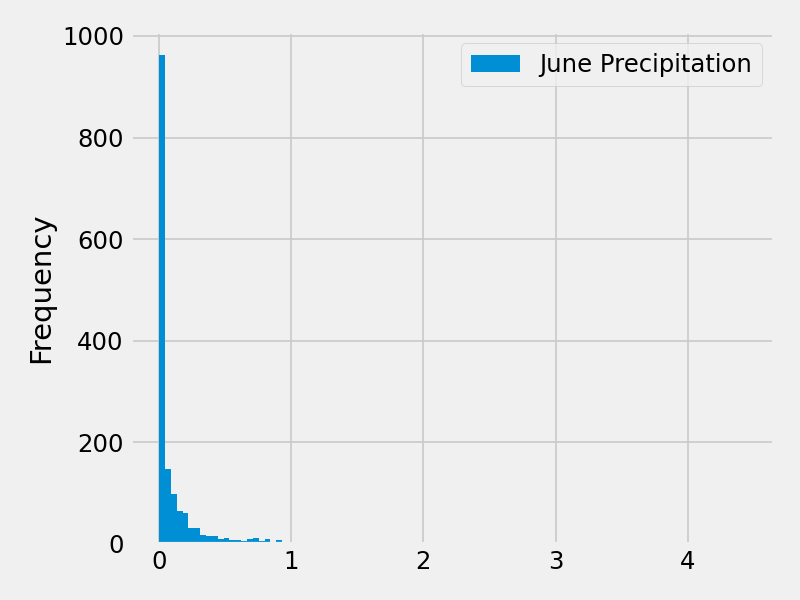

In [43]:
# create histogram of June precipitation data
June_precip_df.plot.hist(bins=100)
plt.tight_layout()

In [21]:
# create DataFrame that calculates summary statistics for precipitation in December
results = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12").all()
Dec_precip_df = pd.DataFrame(results, columns=['Date','December Precipitation'])
Dec_precip_df.set_index(Dec_precip_df['Date'],inplace=True)
Dec_precip_df.head()

,Date,December Precipitation
Date,,
2010-12-01,2010-12-01,0.04
2010-12-03,2010-12-03,0.00
2010-12-04,2010-12-04,0.00
2010-12-06,2010-12-06,0.00
2010-12-07,2010-12-07,0.00


In [22]:
# calculate and print out summary statistics for Dec precipitation
Dec_precip_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<IPython.core.display.Javascript object>


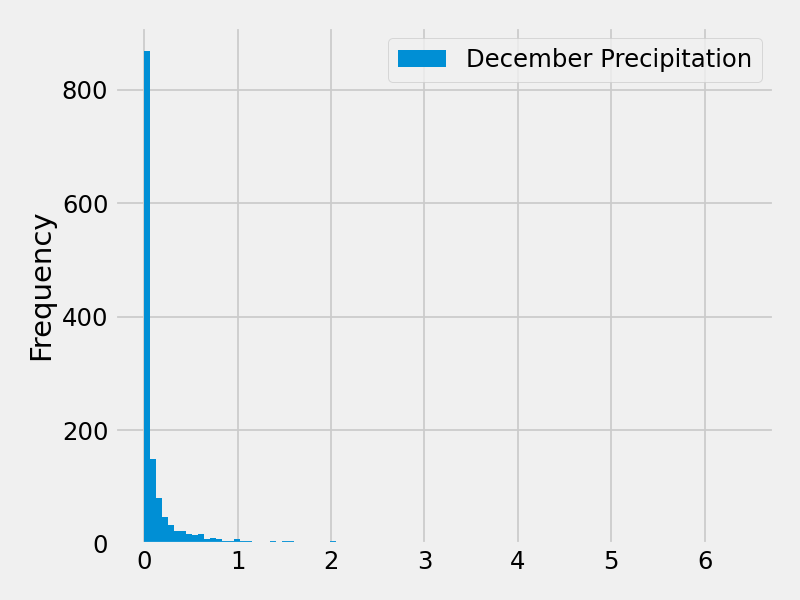

In [42]:
# create histogram of December precipitation data
Dec_precip_df.plot.hist(bins=100)
plt.tight_layout()